### KL Divergence

$Q$ distribution is the reference.

$D_{\mathrm{KL}}(P||Q)$: How different $P$ is against $Q$

$$
D_{\mathrm{KL}}(P||Q) = \sum_{x\in\chi} P(x) \log\left(\frac{P(x)}{Q(x)}\right)
$$

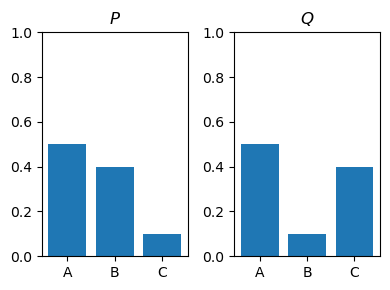

In [30]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([.5, .4, .1])
Q = np.array([.5, .1, .4])

fig, ax = plt.subplots(1,2,figsize=(4,3))

ax[0].set_title('$P$')
ax[0].bar(list('ABC'), P)
ax[0].set_ylim(0,1)

ax[1].set_title('$Q$')
ax[1].bar(list('ABC'), Q)
ax[1].set_ylim(0,1)

plt.tight_layout()
plt.show()

In [44]:
kl = np.sum(P * np.log(P/Q)) # weighted average with respective to the porportion of dist P
print(kl)

0.4158883083359671


$$
D_{\mathrm{KL}}(P||Q) = \int_{-\infty}^{\infty} p(x) \log \left( \frac{p(x)}{q(x)} \right) dx
$$

In [144]:
from ipywidgets import interactive
from scipy.stats import norm


def plot(mu=-6, sigma=1):
    fig, ax = plt.subplots(2,1,figsize=(6,4))

    x = np.linspace(-10, 10, 2001)

    P = norm.pdf(x, loc=mu, scale=sigma)
    Q = norm.pdf(x)

    f = P * np.log(P/Q)
    kl = (f * 0.01).sum()

    ax[0].plot(x, P, label="$P$")
    ax[0].plot(x, Q, label="$Q$")
    ax[0].set_xlim(-10, 10)
    ax[0].legend(loc='upper right')
    ax[0].set_title(r"$D_{\mathrm{KL}}(P||Q) = $" + f"{kl:.5f}")

    ax[1].plot(x, f, label=r"$p(x)\ \log\left(\dfrac{p(x)}{q(x)}\right)$")
    ax[1].set_xlim(-10, 10)
    ax[1].axhline(0, lw=1, c='grey')
    m = np.abs(f).max() * 1.1
    if m != 0:
        ax[1].set_ylim(-m,m)
    ax[1].legend(loc='lower right')

    fig.gca().yaxis.set_major_formatter("{:.1f}".format)
    fig.tight_layout()
    plt.show()

interactive(plot, mu=(-6,6,.1), sigma=(1,2,.1))

interactive(children=(FloatSlider(value=-6.0, description='mu', max=6.0, min=-6.0), FloatSlider(value=1.0, des…